In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   schechter         import schechter
from   SV3.define_sample import define_sample

In [4]:
version = 0.1

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,Z,RMAG_DRED,MRH,REFGMR0P1,TARGETID
float64,float64,float64,float64,float64,float64,int64
3.7721402325126423,4.986124929665064,0.33743800813349156,18.87912014731125,-21.60017018500573,0.5029794807690177,0
7.291777572226474,5.216303136427634,0.3358367990279134,19.164485916386255,-21.501643485972103,0.8556049162235593,1
7.271421307032053,5.216813907554459,0.33204277967971185,18.6560738852402,-21.86481444281342,0.6210244102305459,2
7.294683707223873,5.194670649537063,0.3352653718478176,18.923197975657814,-21.416994113457505,0.3562284861943139,3
7.285466104202744,5.2123990016212325,0.3354775369684668,18.197760241964705,-22.500363698331853,0.9118769578721373,4
7.278751592950828,5.213135659398867,0.3395093738207222,19.456602708279306,-21.076593269699252,0.6392363346086005,5
7.385632448576024,5.219834477698842,0.3348199547546389,18.848583906783773,-21.87497619154432,0.9558292991507985,6
7.379988039301598,5.228525331786011,0.3361835673008482,19.387139224724134,-21.37391087548854,1.1065703757197651,7
3.722997589545035,5.043528437008822,0.33876649152353333,18.87975957082224,-21.892940844505468,0.97098179347477,8


In [6]:
all_sky_deg2 = 4. * np.pi * (180. / np.pi)**2.
all_sky_deg2

41252.96124941928

In [7]:
fsky = 100. / all_sky_deg2
fsky

0.0024240684055476798

Text(0.5, 1.0, '$f_{sky}$=0.002424')

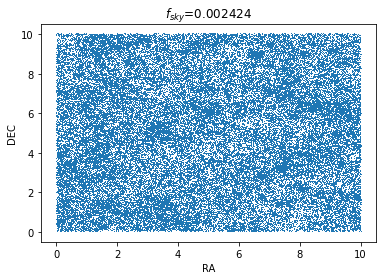

In [8]:
pl.plot(bright_merge_obs['RA'], bright_merge_obs['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

pl.title(r'$f_{sky}$' + '={:.6f}'.format(fsky))

Text(0, 0.5, 'N per $\\Delta Z=0.025$')

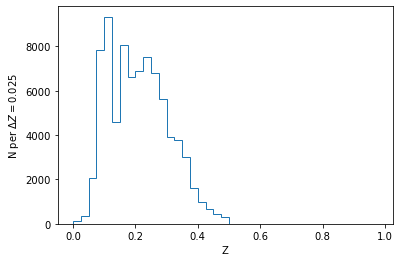

In [9]:
dz = 0.025
_  = pl.hist(bright_merge_obs['Z'], bins=np.arange(0.0, 1.0, dz), histtype='step')

pl.xlabel('Z')
pl.ylabel('N per $\Delta Z={:0.3f}$'.format(dz))

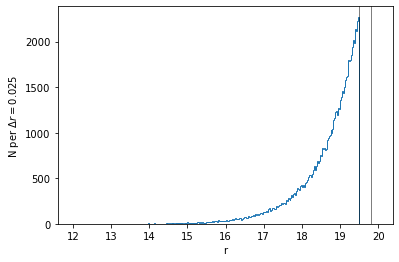

In [10]:
dr = 0.025
_  = pl.hist(bright_merge_obs['RMAG_DRED'], bins=np.arange(12.0, 20.0, dr), histtype='step')

pl.xlabel('r')
pl.ylabel('N per $\Delta r={:0.3f}$'.format(dr))

pl.axvline(19.5, c='k', lw=0.5)
pl.axvline(19.8, c='k', lw=0.5)

Text(0, 0.5, 'Ref. $(g-r)$')

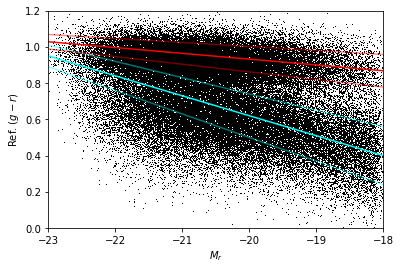

In [11]:
pl.plot(bright_merge_obs['MRH'], bright_merge_obs['REFGMR0P1'], marker=',', lw=0.0, c='k')

Ms    = np.arange(-23., -18., 0.01)

blues = 0.620 - 0.110 * (Ms + 20.)
brms  = 0.120 + 0.020 * (Ms + 20.)

reds  = 0.932 - 0.032 * (Ms + 20.)
rrms  = 0.070 + 0.010 * (Ms + 20.)

pl.plot(Ms, blues,      c='cyan')
pl.plot(Ms, blues+brms, c='cyan', alpha=0.45)
pl.plot(Ms, blues-brms, c='cyan', alpha=0.45)

pl.plot(Ms,  reds,      c='red')
pl.plot(Ms,  reds+rrms, c='red', alpha=0.45)
pl.plot(Ms,  reds-rrms, c='red', alpha=0.45)

pl.xlim(-23., -18.)
pl.ylim(0.0, 1.2)

pl.xlabel(r'$M_r$')
pl.ylabel('Ref. $(g-r)$')

In [12]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_derived_v{:.1f}.fits'.format(version))
derived

INSAMPLE,VOLUME,MRH,GMR_DRED,ZMAX,IVMAX,TARGETID
float64,float64,float64,float64,float64,float64,int64
1.0,8512527.859442476,-21.594433657615397,0.02549266328726363,0.4178996799824834,6.534919358634163e-08,0
1.0,8401008.497279251,-21.525309010057327,0.24297213958990116,0.3727779974127923,8.925058222907302e-08,1
1.0,8140318.044465926,-21.85455632047405,0.13457148224825483,0.43692361033919924,5.794024308823048e-08,2
1.0,8361426.049986088,-21.43272392813322,-0.09781357557697246,0.4137158150326175,6.715701594084879e-08,3
1.0,8376109.378948721,-22.52122054272638,0.2686906630994812,0.4773699361403203,4.5701127027884905e-08,4
1.0,8658116.612267835,-21.12981593394758,0.13066040711787885,0.3446052831908925,1.1083189580047984e-07,5
1.0,8330650.856791828,-21.88400062188045,0.3000200560162286,0.40486342162166516,7.122196395146757e-08,6
1.0,8425084.238880066,-21.395906880514506,0.43815489024358145,0.34786748519460664,1.0798161090406571e-07,7
1.0,8605730.072279539,-21.89567897844807,0.30631414730664064,0.405397298284511,7.096711398231258e-08,8


In [13]:
bright_merge_obs = bright_merge_obs[:len(derived)]

In [14]:
isin = derived['INSAMPLE'].astype(bool)

derived = derived[isin]

In [15]:
np.mean(isin)

1.0

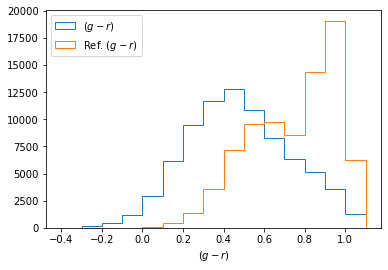

In [16]:
_ = pl.hist(derived['GMR_DRED'], histtype='step', bins=np.arange(-0.4, 1.2, 0.1), label=r'$(g-r)$')
_ = pl.hist(bright_merge_obs['REFGMR0P1'], histtype='step', bins=np.arange(-0.4, 1.2, 0.1), label='Ref. $(g-r)$')

pl.xlabel(r'$(g-r)$')
pl.legend(loc=2)

Text(0.5, 0, '(MJW MRH / AJS MRH)')

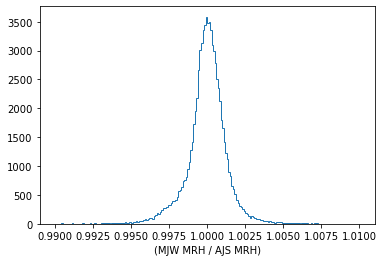

In [17]:
pl.hist(derived['MRH'] / bright_merge_obs['MRH'], histtype='step', bins=np.arange(0.99, 1.01, 0.0001))
pl.xlabel('(MJW MRH / AJS MRH)')

Text(0, 0.5, '$zmax$')

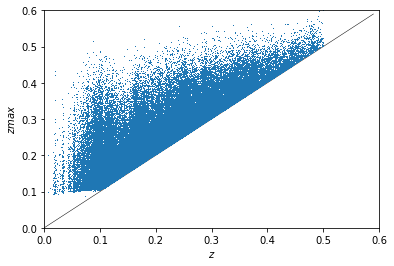

In [18]:
zs = np.arange(0.0, 0.6, 0.01)

pl.plot(zs, zs, c='k', lw=0.5)
pl.plot(bright_merge_obs['Z'], derived['ZMAX'], marker=',', lw=0.0)

pl.xlim(0.0, 0.6)
pl.ylim(0.0, 0.6)

pl.xlabel(r'$z$')
pl.ylabel(r'$zmax$')

Text(0.5, 0, '$M_r - 5 \\log_{10}|h|$')

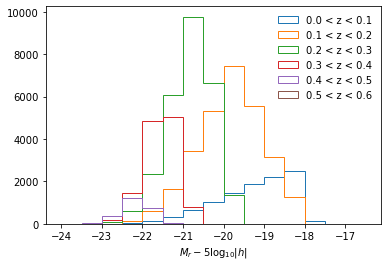

In [19]:
for zcut in np.arange(0.0, 0.6, 0.1):
    in_zcut = (bright_merge_obs['Z'] > zcut) & (bright_merge_obs['Z'] < zcut + 0.1)
    
    zcut_sample = bright_merge_obs[in_zcut]
    
    pl.hist(zcut_sample['MRH'], bins=np.arange(-24.0, -16.0, 0.5), histtype='step', label='{:.1f} < z < {:.1f}'.format(zcut, zcut + 0.1))
    
pl.legend(loc=1, frameon=False)
pl.xlabel(r'$M_r - 5 \log_{10}|h|$')

In [20]:
derived['PHIKERNEL']   = derived['IVMAX']

In [21]:
derived['MRH'].min(), derived['MRH'].max()

(-23.356245724668774, -17.548385694483216)

In [22]:
len(derived), len(bright_merge_obs)

(80502, 80502)

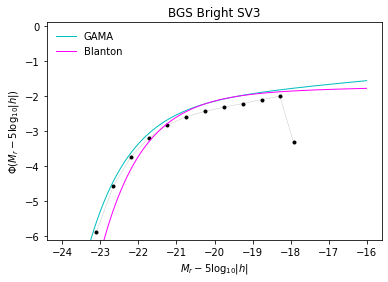

In [24]:
derived['MRH_IDX']        = np.digitize(derived['MRH'], bins=np.arange(-24.0, -10.0, 0.5))

derived_grouped           = derived.group_by(['MRH_IDX'])
derived_grouped['NGROUP'] = 1 

derived_addbinned         = derived_grouped['MRH', 'PHIKERNEL', 'NGROUP'].groups.aggregate(np.add)
derived_mnbinned          = derived_grouped['MRH', 'PHIKERNEL'].groups.aggregate(np.mean)

derived_addbinned['MRH']  = derived_mnbinned['MRH']

isin                      = derived_addbinned['NGROUP'] > 10

## 
Ms = np.arange(-24., -16., 0.01)

pl.plot(derived_mnbinned['MRH'][isin], np.log10(derived_addbinned['PHIKERNEL'][isin]), marker='.', c='k', lw=0.1)

pl.plot(Ms, np.log10(schechter(Ms)), c='c', lw=1., label='GAMA')
pl.plot(Ms, np.log10(schechter(Ms, named_type='Blanton')), c='magenta', lw=1., label='Blanton')

pl.ylim(-6.1, 0.1)

pl.xlabel(r'$M_r - 5\log_{10}|h|$')
pl.ylabel(r'$\Phi(M_r - 5\log_{10}|h|)$')

pl.title('BGS Bright SV3')

pl.legend(frameon=False, loc=2)

# Done.